$\def \dot #1#2{\left\langle #1, #2 \right\rangle}$
$\def \adot #1#2{\left\langle #1, #2 \right\rangle}$
$\def \cD {\mathcal{D}}$
$\def \cW {\mathcal{W}}$
$\def \bc {\mathbf{c}}$
$\def \bv {\mathbf{v}}$
$\def \bG {\mathbf{G}}$

# A measurement-driven greedy algorithm

We have a solution $u$ (actually $u_h$, i.e. the solution of FEM here, but lets just assume it is ground truth here). 
We're given our measurement space $W_m = \mathrm{span}\{w_1,\ldots,w_m\}$. We have a series of measurements $\langle w_i, u\rangle_V$, and we write $w := P_{W_m} u$, the projection of $u$ in $W_m$.

This algorithm makes a very simple adjustment to the greedy algorithm - it does the argmax search in the $W_m$ projection. Of course as $n \to m$ there is nothing we can do about $\beta(V_n, W_m) \to 0$.

__Remarks:__
 - __Note that $\dot{\cdot}{\cdot} = \dot{\cdot}{\cdot}_{V_h}$ here.__
 - We can __assume that the $\omega_i$ are orthonormal__ as it is a fixed basis.
 - We store $\dot{\omega_i}{v}$ for each $v\in \cD$, so can we di all projections and inner-products in $\mathbb{R}^m$? And furthermore without the need of a Gram matrix $\dot{\phi_i}{\phi_j}$ to do the projection or orthonormalisation of $\phi_i$?
 - Finally, remember that _we can not know anything about $u$ other than $w :=P_{W_m} u$_, and we abuse notation slightly and also write $w=\dot{\omega_i}{u}$ for the vector in $\mathbb{R}^m$ (again, we assume the $\omega_i$ are orthonormal).
 
In the algorithms below we have some dictionary $\cD$ which we take to We have a dictionary $\cD$ of solutions $v(y)$, which we get from generating random points in $y\in[-1,1]^{d}$ ($d=16$ in the experiments below), find the field $a(y)$ and then $v(y) = \frac{u_h(a(y))}{\| u_h(a(y)) \|_{V_h}}$ (i.e. we normalise all elements). 

### Algorithm 1 - Pure Greedy

The first algorithm doesn't depend on $W_m$ at all. Given the dictionary $\cD$ we chose
$$
\phi_1 = {\arg\max}_{v\in\cD} \| v \|
$$
and given $V_{n}=\mathrm{span}\{\phi_1, \ldots, \phi_n\}$, our next choice is
$$
\phi_{n+1} = {\arg\max}_{v\in\cD} \| v - P_{V_n} v \|
$$

### Algorithm 2: Measurement based orthogonal matching pursuit

Now we only work with $w$ and $P_{W_m} v$, hence we can do all calculations in $\mathbb{R}^m$.

Once again the first element $\phi_1$ is chosen as 

$$ \phi_1 = {\arg\max}_{v\in \cD} \adot{w}{v}$$

and given our collection $V_{n}=\mathrm{span}\{\phi_1, \ldots, \phi_n\}$ we have that $P_{W_m} V_n = \mathrm{span}\{P_{W_m} \phi_1,\ldots,P_{W_m} \phi_n\}$, and our next choice is

$$ \phi_{n+1} = {\arg\max}_{v\in \cD} \adot{w - P_{P_{W_m} V_n} w}{\frac{P_{W_m} v}{\|P_{W_m} v\|}}$$

The calculation of $P_{P_{W_m} V_n} w$ is a straightforward solving of a linear problem. We have
$$
\dot{w}{P_{W_m} \phi_i} = \dot{P_{P_{W_m} V_n} w}{P_{W_m} \phi_i}
$$
and we have
$$
P_{P_{W_m} V_n} w = \sum_{i=1}^n c_i P_{W_m} \phi_i  %= \sum_{i=1}^n \sum_{j=1}^m c_i \dot{\omega_j}{\phi_i} \omega_j
$$
so clearly 

$$
\dot{w}{P_{W_m} \phi_j} = \sum_{i=1}^n c_i \dot{P_{W_m} \phi_j}{P_{W_m} \phi_i}.
$$

In addition to this we have that $w = \sum_{k=1}^{m} \dot{u}{\omega_k} \omega_k$ and $P_{W_m} \phi_i = \sum_{k=1}^m \dot{\phi_i}{\omega_k} \omega_k$, and $\dot{P_{W_m} \phi_i}{P_{W_m} \phi_j} = \sum_{k=1}^m \dot{\omega_k}{\phi_j} \dot{\omega_k}{\phi_i}$, hence we solve

$$
\sum_{k=1}^{m} \dot{u}{\omega_k} \dot{\phi_i}{\omega_k} = \sum_{j=1}^n c_j \sum_{k=1}^m \dot{\omega_k}{\phi_j} \dot{\omega_k}{\phi_i}
$$

### Algorithm 3: Measurement based projection pursuit

The first element $\phi_1$ is chosen as 

$$ \phi_1 = {\arg\min}_{v\in \cD} \| w - P_{P_{W_m} v} w \|.$$

we have $\| w - P_{P_{W_m} v} w \|^2 = \| w \|^2 - \| P_{P_{W_m} v} w \|^2 = \| w \|^2 - \frac{\dot{w}{P_{W_m} v}^2}{\dot{P_{W_m} v}{P_{W_m} v}^2} = \| w \|^2 - \frac{\dot{w}{v}^2}{\dot{P_{W_m} v}{P_{W_m} v}^2}$, we see that 
this is equivalent to

$$ \phi_1 = {\arg\max}_{v\in \cD} \frac{\adot{w}{v}}{\adot{P_{W_m} v}{P_{W_m} v}},$$

which again can be performed in $\mathbb{R}^m$.

Now given our collection $V_{n}=\mathrm{span}\{\phi_1, \ldots, \phi_n\}$ our next choice is

$$ \phi_{n+1} = {\arg\min}_{v\in \cD} \| w - P_{P_{W_m} (V_n\oplus \mathbb{R} v)} w \|$$

In terms of vectors $z \in \cW = \{ P_{W_m} \phi : \text{for } v \in \cD \}$ and the space $Z_n = P_{W_m} V_n = \mathrm{span}\{ P_{W_m} \phi_1,\ldots,P_{W_m}\phi_n\} = \mathrm{span}\{ z_1,\ldots,z_n\}$

$$
 z_{n+1} = {\arg\min}_{z\in\cW} \| w - P_{Z_n \oplus \mathbb{R}z} w \|
$$

which is also performed in $\mathbb{R}^m$, but now requires calculating projections for every single candidate vector from the dictionary.

In [1]:
import numpy as np
import scipy as sp

import seaborn as sns
import matplotlib.pyplot as plt
import pdb

import sys
sys.path.append("../../")
import pyhilbert as hil
import pyredmod as rm

%matplotlib inline

### Generate the solution $u$ that we want to approximate

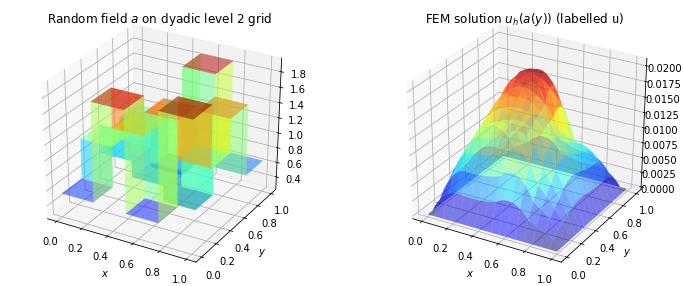

In [2]:
def make_soln(points, field_space, fem_space, a_bar=1.0, c=0.5, f=1.0, verbose=False):
    
    solns = hil.Basis(np.zeros((H1_fine.n, len(points))), space=H1_fine)
    fields = []
    
    for i, p in enumerate(points):
        field = hil.Vector(a_bar + c * p, space=field_space)
        fields.append(field)
        # Then the fem solver (there a faster way to do this all at once? This will be huge...
        fem_solver = hil.DyadicFEMSolver(fem_space = fem_space, rand_field = field, f = 1)
        fem_solver.solve()
        solns._values[:,i] = fem_solver.u.values
        
    return solns, fields

fem_div = 7
H1_fine = hil.H1DyadicSq(fem_div)
field_div = 2
L2_coarse = hil.L2DyadicSq(field_div)
a_bar = 0.1
c = 2.0
side_n = 2**field_div

def diffusion_pde(points):
    solns, fields = make_soln(points, field_space=L2_coarse, fem_space=H1_fine, a_bar=a_bar, c=c)
    return solns

np.random.seed(5)
u, a = make_soln(np.random.random((1,side_n * side_n)), field_space=L2_coarse, fem_space=H1_fine, a_bar=a_bar, c=c)
u = u[0]; a = a[0]
                           
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 2, 1, projection='3d')
a.plot(ax, title='Random field $a$ on dyadic level 2 grid')
ax = fig.add_subplot(1, 2, 2, projection='3d')
u.plot(ax, title='FEM solution $u_h(a(y))$ (labelled $\mathtt{u}$)')
plt.show()

### Generate the basis $W_m$ of randomly placed local averages

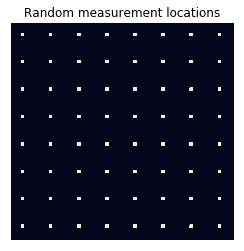

In [3]:
# local_width is the width of the measurement squares in terms of FEM mesh squares
width_div = 1
local_width = 2**width_div
spacing_div = 4

Wm_reg, Wloc_reg = rm.make_local_avg_grid_basis(width_div, spacing_div, fem_div, return_map=True)
Wm = Wm_reg.orthonormalise()

m = Wm_reg.n

fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(1, 1, 1)
sns.heatmap(Wloc_reg, xticklabels=False, yticklabels=False, cbar=False, ax=ax)
ax.set_title('Random measurement locations')
plt.show()

### Generate the dictionary of random snapshots

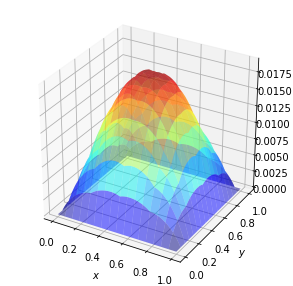

In [4]:
N = int(1e3)
np.random.seed(1)
dict_params = np.random.random((N, side_n * side_n))
dict_basis, dict_fields = make_soln(dict_params, field_space=L2_coarse, fem_space=H1_fine, a_bar=a_bar, c=c, f=1.0)

# For now the barycenter. Later though might try Cheb center
center = dict_basis @ (np.ones(N)/N)
dict_centered = dict_basis - center

#for i, d in enumerate(dict_basis):
#    dict_basis[i] = d / d.norm()

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(1, 1, 1, projection='3d')
center.plot(ax)
plt.show()

In [5]:
Vn_sin = rm.make_sin_basis(div=fem_div, N=8)

np.random.seed(10)
Vn_red_params = np.random.random((m, side_n * side_n))
Vn_red, Vn_red_fields = make_soln(Vn_red_params, field_space=L2_coarse, fem_space=H1_fine, a_bar=a_bar, c=c, f=1.0)

# First 4 dictionary elements $u_i \in \mathcal{D}$

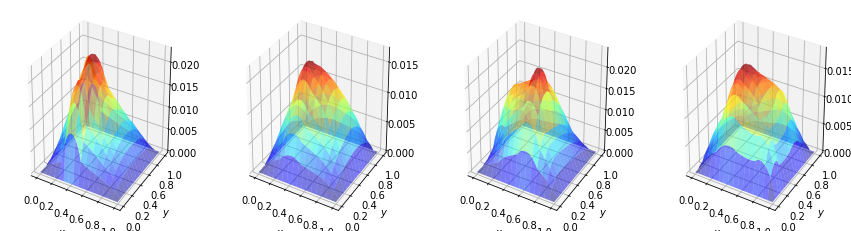

In [6]:
fig = plt.figure(figsize=(15, 4))
for i, v in enumerate(Vn_red[:4]):
    ax = fig.add_subplot(1, 4, i+1, projection='3d')
    v.plot(ax)
plt.show()

0.0008307857340303444 0.0008992890665844169


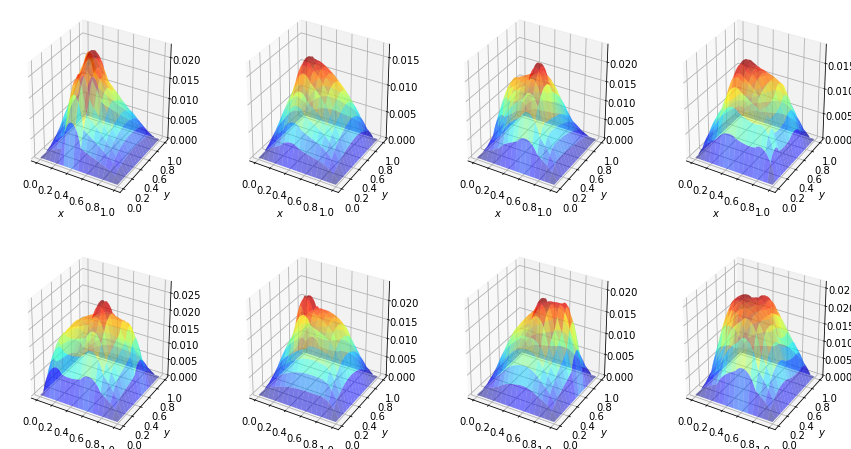

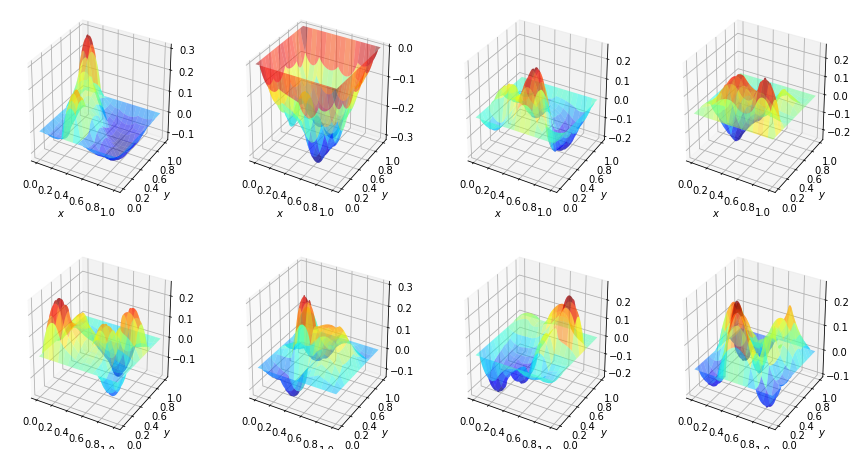

In [7]:
w = Wm_reg.project(u)
Vn_red_o = (Vn_red - center).orthonormalise()

lin_est = rm.LinearWorstCaseEstimator(Vn=Vn_red_o[:20], center = center, Wm=Wm)

print((Vn_red.project(u) - u).norm(), (Vn_red_o.project(u-center) - (u-center)).norm())

fig = plt.figure(figsize=(15, 8))
for i, v in enumerate(Vn_red[:8]):
    ax = fig.add_subplot(2, 4, i+1, projection='3d')
    v.plot(ax)
plt.show()

fig = plt.figure(figsize=(15, 8))
for i, v in enumerate(Vn_red_o[:8]):
    ax = fig.add_subplot(2, 4, i+1, projection='3d')
    v.plot(ax)
plt.show()

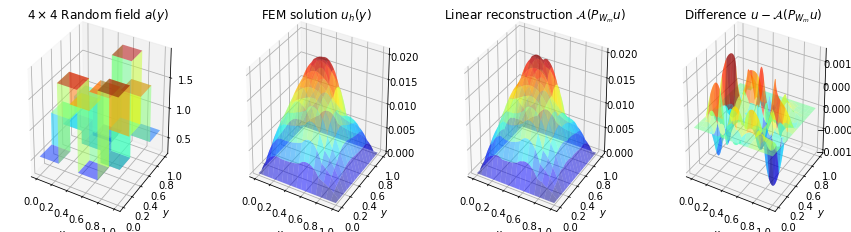

In [8]:
u_star, v_star = lin_est.measure_and_reconstruct(u)

fig = plt.figure(figsize=(15, 4))
ax = fig.add_subplot(1, 4, 1, projection='3d')
a.plot(ax, title=r'$4 \times 4$ Random field $a(y)$')
ax = fig.add_subplot(1, 4, 2, projection='3d')
u.plot(ax, title=r'FEM solution $u_h(y)$')
ax = fig.add_subplot(1, 4, 3, projection='3d')
u_star.plot(ax, title=r'Linear reconstruction $\mathcal{A}(P_{W_m} u)$')
ax = fig.add_subplot(1, 4, 4, projection='3d')
(u - u_star).plot(ax, title=r'Difference $ u - \mathcal{A}(P_{W_m} u)$')

In [9]:
Vns = [Vn_sin, Vn_red]
Vns_affine = [Vn_sin, Vn_red]
Vn_labels = Vn_labels_affine = ['Sinusoid', 'Random']

g = rm.GreedyApprox(dict_basis, verbose=True)
g.construct_to_n(m)
Vns.append(g.Vn[:m])

g = rm.GreedyApprox(dict_centered, verbose=True)
g.construct_to_n(m)
Vns_affine.append(g.Vn[:m])

Vn_labels.append('Plain greedy')

for alg, Vn_label in zip([rm.MeasBasedOMP, rm.MeasBasedPP], ['Data based OMP', 'Data based PP']):    
    cons = alg(dict_basis, u, Wm, verbose=True)
    cons.construct_to_n(m)
    Vns.append(cons.Vn[:m])

    cons = alg(dict_centered, u-center, Wm, verbose=True)
    cons.construct_to_n(m)
    Vns_affine.append(cons.Vn[:m])
    
    Vn_labels.append(Vn_label)

i 	 Selection 	 Sel. criteria
1 : 	 761 	 0.11322344778420701
2 : 	 223 		 0.823112787285846
3 : 	 35 		 0.7335944894325813
4 : 	 868 		 0.7040042049349593
5 : 	 195 		 0.6825824497207938
6 : 	 252 		 0.6542961986359588
7 : 	 246 		 0.6186527450840671
8 : 	 883 		 0.6112289552742611
9 : 	 542 		 0.5846097587237398
10 : 	 714 		 0.5731546592836401
11 : 	 27 		 0.5701290086562325
12 : 	 361 		 0.534881248207176
13 : 	 658 		 0.5108708567810716
14 : 	 454 		 0.48303178440025796
15 : 	 224 		 0.4759940035773524
16 : 	 242 		 0.45817490584816106
17 : 	 727 		 0.4457319963261314
18 : 	 84 		 0.42687118954836656
19 : 	 910 		 0.4061358903259326
20 : 	 881 		 0.4018547732644724
21 : 	 6 		 0.4002194912216157
22 : 	 7 		 0.38177289116851426
23 : 	 429 		 0.37168181815545853
24 : 	 987 		 0.34329835690419835
25 : 	 374 		 0.3190445878906247
26 : 	 267 		 0.3072990959709621
27 : 	 740 		 0.30723546769176313
28 : 	 91 		 0.2957092024040428
29 : 	 739 		 0.28780250907155697
30 : 	 537 		 0.27836856

3 : 	 301 		 0.00466233786474888
4 : 	 817 		 0.003178598230665364
5 : 	 597 		 0.0025041262496864787
6 : 	 404 		 0.0022444052330428577
7 : 	 110 		 0.0020986257296910418
8 : 	 814 		 0.001947448175866383
9 : 	 944 		 0.0016037130436660132
10 : 	 6 		 0.0014772574047683296
11 : 	 192 		 0.001275476900036743
12 : 	 261 		 0.001110163335770447
13 : 	 557 		 0.0009167140949187042
14 : 	 377 		 0.0007776212645004053
15 : 	 784 		 0.0006577838179242669
16 : 	 237 		 0.0005913725417454227
17 : 	 555 		 0.0005484917315501722
18 : 	 57 		 0.0004713136103103939
19 : 	 645 		 0.0004393068560349651
20 : 	 586 		 0.00039503475557471483
21 : 	 558 		 0.000349697149278252
22 : 	 677 		 0.00031812055808024285
23 : 	 494 		 0.0002798545364236064
24 : 	 445 		 0.00026236739302875635
25 : 	 607 		 0.0002473911763666682
26 : 	 527 		 0.00021291236119797737
27 : 	 324 		 0.00017407854167098642
28 : 	 893 		 0.0001592260003830184
29 : 	 386 		 0.00014554020328454365
30 : 	 936 		 0.00013022925834340634
31

In [10]:
stats = np.zeros([6, len(Vns), m])
stats_affine = np.zeros([6, len(Vns_affine), m])

for j, Vn_big in enumerate(Vns):
    Vn_big = Vn_big.orthonormalise()

    print('Reconstructions for pair: ' + Vn_labels[j])
    for i, n in enumerate(range(2,min(Vn_big.n, m))):   
        Vn = Vn_big[:n]
        
        u_p_v = Vn.project(u)
        
        lin_est = rm.LinearWorstCaseEstimator(Vn=Vn, Wm=Wm)
        u_star, v_star = lin_est.measure_and_reconstruct(u)
        
        stats[0, j, n] = (u - u_star).norm()
        stats[1, j, n] = (u - u_p_v).norm()
        stats[2, j, n] = lin_est.beta()
        stats[3, j, n] = lin_est.cond
        stats[4, j, n] = (u_star - v_star).norm()
    
        
for j, Vn_big in enumerate(Vns_affine):
    print('Reconstructions for pair: ' + Vn_labels[j])
    Vn_big = Vn_big.orthonormalise()
    
    for i, n in enumerate(range(2,min(Vn_big.n, m))):   
        Vn = Vn_big[:n]
        u_p_v = Vn.project(u - center)
        
        lin_est = rm.LinearWorstCaseEstimator(Vn=Vn, center=center, Wm=Wm)
        u_star, v_star = lin_est.measure_and_reconstruct(u)

        stats_affine[0, j, n] = (u-u_star).norm()
        stats_affine[1, j, n] = (u-center-u_p_v).norm()
        stats_affine[2, j, n] = lin_est.beta()
        stats_affine[3, j, n] = lin_est.cond
        stats_affine[4, j, n] = (u_star - v_star).norm()
        

Reconstructions for pair: Sinusoid
Reconstructions for pair: Random
Reconstructions for pair: Plain greedy
Reconstructions for pair: Data based OMP
Reconstructions for pair: Data based PP
Reconstructions for pair: Sinusoid
Reconstructions for pair: Random
Reconstructions for pair: Plain greedy
Reconstructions for pair: Data based OMP
Reconstructions for pair: Data based PP


['Sinusoid', 'Random', 'Plain greedy', 'Data based OMP', 'Data based PP']


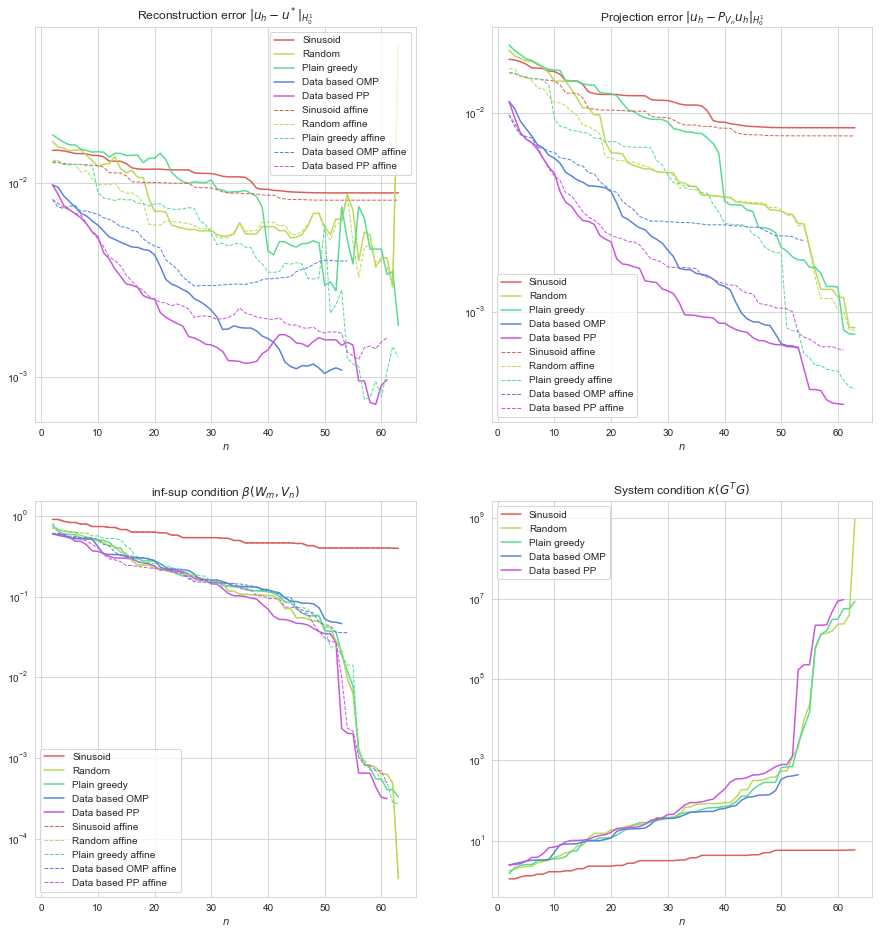

In [11]:
num_res = len(Vns)
sns.set_palette('hls', num_res)
cp = sns.color_palette()
sns.set_style('whitegrid')

axs = []
fig = plt.figure(figsize=(15, 16))
axs.append(fig.add_subplot(2, 2, 1, title='Reconstruction error $\| u_h - u^* \|_{H_0^1}$'))
axs[-1].set(yscale="log", xlabel='$n$')
axs.append(fig.add_subplot(2, 2, 2, title='Projection error $\| u_h - P_{V_n} u_h \|_{H_0^1}$'))
axs[-1].set(yscale="log", xlabel='$n$')
axs.append(fig.add_subplot(2, 2, 3, title=r'inf-sup condition $\beta(W_m, V_n)$'))
axs[-1].set(yscale="log", xlabel='$n$')
axs.append(fig.add_subplot(2, 2, 4, title=r'System condition $\kappa(G^T G)$'))
axs[-1].set(yscale="log", xlabel='$n$')
#axs.append(fig.add_subplot(3, 2, 2, title='$\| u^* - v^* \|_{H_0^1}$'))
#axs[-1].set(yscale="log", xlabel='$n$')

print(Vn_labels)
for j, basis_label in enumerate(Vn_labels):

    axs[0].plot(range(2, Vns[j].n), stats[0, j, 2:Vns[j].n], label=basis_label, color=cp[j])
    axs[0].legend(loc=0)
    axs[1].plot(range(2, Vns[j].n), stats[1, j, 2:Vns[j].n], label=basis_label, color=cp[j])
    axs[1].legend(loc=3)
    axs[2].plot(range(2, Vns[j].n), stats[2, j, 2:Vns[j].n], label=basis_label, color=cp[j])
    axs[2].legend(loc=3)
    axs[3].plot(range(2, Vns[j].n), stats[3, j, 2:Vns[j].n], label=basis_label, color=cp[j])
    axs[3].legend(loc=2)

for j, basis_label in enumerate(Vn_labels):
    axs[0].plot(range(2, Vns_affine[j].n), stats_affine[0, j, 2:Vns_affine[j].n], '--', lw=1, label=basis_label+' affine', color=cp[j])
    axs[0].legend(loc=0)
    axs[1].plot(range(2, Vns_affine[j].n), stats_affine[1, j, 2:Vns_affine[j].n], '--', lw=1, label=basis_label+' affine', color=cp[j])
    axs[1].legend(loc=3)
    axs[2].plot(range(2, Vns_affine[j].n), stats_affine[2, j, 2:Vns_affine[j].n], '--', lw=1, label=basis_label+' affine', color=cp[j])
    axs[2].legend(loc=3)
plt.savefig('figs/GreedyDataBasedAffineResults.pdf')
plt.show()

## PCA truncation vs PCA Gaussian estimator

In [12]:
Vn_PCA, sigma_sq, center = rm.pca_from_samples(dict_basis)

In [13]:
n_cut = 10

lin_est = rm.LinearWorstCaseEstimator(Vn=Vn_PCA[:n_cut], center = center, Wm=Wm)
nor_est = rm.GaussianEstimator(mean = center, Phi = Vn_PCA[:n_cut], sigma_sq = sigma_sq[:n_cut], Wm = Wm)

w, w_coords = Wm.project(u, return_coeffs=True)

u_star, v_star = lin_est.measure_and_reconstruct(u)
u_star_nor = nor_est.best_estimate(w_coords)

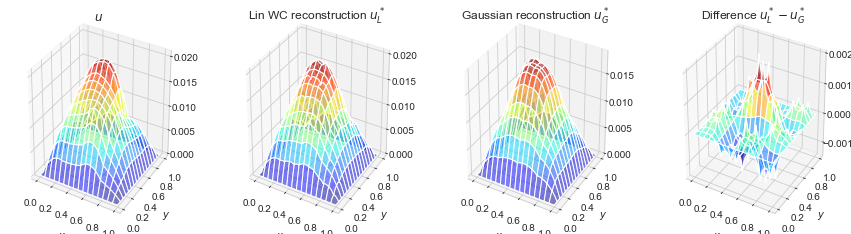

In [14]:
fig = plt.figure(figsize=(15, 4))
ax = fig.add_subplot(1, 4, 1, projection='3d')
u.plot(ax, title=r'$u$')
ax = fig.add_subplot(1, 4, 2, projection='3d')
u_star.plot(ax, title=r'Lin WC reconstruction $u_L^*$')
ax = fig.add_subplot(1, 4, 3, projection='3d')
u_star_nor.plot(ax, title=r'Gaussian reconstruction $u_G^*$')
ax = fig.add_subplot(1, 4, 4, projection='3d')
(u_star - u_star_nor).plot(ax, title=r'Difference $u_L^* - u_G^*$')

In [15]:
diff = np.zeros((2,m))

for n in range(2,m):

    lin_est = rm.LinearWorstCaseEstimator(Vn=Vn_PCA[:n], center = center, Wm=Wm)
    nor_est = rm.GaussianEstimator(mean = center, Phi = Vn_PCA[:n], sigma_sq = sigma_sq[:n], Wm = Wm)

    w, w_coords = Wm.project(u, return_coeffs=True)

    u_star, v_star = lin_est.measure_and_reconstruct(u)
    u_star_nor = nor_est.best_estimate(w_coords)
    
    diff[0, n] = (u - u_star).norm()
    diff[1, n] = (u - u_star_nor).norm()

In [16]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
plt.plot(range(2,m), diff[0, 2:], label='PCA truncated')
plt.plot(range(2,m), diff[1, 2:], label='PCA normal estimator')
plt.legend()
plt.show()

# Testing for an ensemble of solutions

In [17]:
N_te = 10
d = side_n * side_n
y_range = np.zeros((d,2))
y_range[:,1] = 1

np.random.seed(11)
points_te = np.random.random((N_te, d)) * (y_range[:, 1] - y_range[:, 0]) + y_range[:, 0]
U_te = diffusion_pde(points_te)

ws_te = Wm.A @ U_te
print(ws_te.shape)

(64, 10)


In [18]:
import pdb
Vn_big = Vn_sin.orthonormalise()
for i, n in enumerate(range(2,min(Vn_big.n, m))):   
    Vn = Vn_big[:n]

    lin_est = rm.LinearWorstCaseEstimator(Vn=Vn, Wm=Wm)
    U_star, V_star = lin_est.best_estimator(ws_te)
    for j, u in enumerate(U_te): 
        u_star, v_star = lin_est.best_estimator(ws_te[:,j])
        if (u_star - U_star[j]).norm() > 1e-10:
            pdb.set_trace()

In [19]:
stats = np.zeros([6, len(Vns), N_te, m])
stats_affine = np.zeros([6, len(Vns_affine), N_te, m])

for j, Vn_big in enumerate(Vns):
    print('Reconstructions for pair: ' + Vn_labels[j])
    Vn_big = Vn_big.orthonormalise()
    
    for i, n in enumerate(range(2,min(Vn_big.n, m))):   
        Vn = Vn_big[:n]
        u_p_v = Vn.A @ U_te
        
        lin_est = rm.LinearWorstCaseEstimator(Vn=Vn, Wm=Wm)
        u_star, v_star = lin_est.best_estimator(ws_te)

        stats[0, j, n] = (U_te-u_star).norm()
        stats[1, j, n] = (u - u_p_v).norm()
        stats[2, j, n] = lin_est.beta()
        stats[3, j, n] = lin_est.cond
        stats[4, j, n] = (u_star - v_star).norm()

for j, Vn_big in enumerate(Vns_affine):
    print('Reconstructions for pair: ' + Vn_labels[j])
    Vn_big = Vn_big.orthonormalise()
    
    for i, n in enumerate(range(2,min(Vn_big.n, m))):
        Vn = Vn_big[:n]

        u_p_v = Vn.project(u - center)
        
        lin_est = rm.LinearWorstCaseEstimator(Vn=Vn, center=center, Wm=Wm)
        u_star, v_star = lin_est.measure_and_reconstruct(u)

        stats_affine[0, j, n] = (u-u_star).norm()
        stats_affine[1, j, n] = (u-center-u_p_v).norm()
        stats_affine[2, j, n] = lin_est.beta()
        stats_affine[3, j, n] = lin_est.cond
        stats_affine[4, j, n] = (u_star - v_star).norm()

Reconstructions for pair: Sinusoid


TypeError: operand 'Vector' does not support ufuncs (__array_ufunc__=None)

In [ ]:
pos_sensors = np.load('./olga_scripts/pos_sensors.npy')
pos_sensors.shape

In [ ]:
pos_sensors